# Car Price prediction v3



### About Dataset
> This dataset contains information about used cars.
> This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
> The columns in the given dataset are as follows:

+ name
+ year
+ selling_price
+ km_driven
+ fuel
+ seller_type
+ transmission
+ Owner

<br>[Car price](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)



## Démarche de travail en Machine Learning
#### Exploratory Data Analysis : 
> comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.
Checklist (non-exhaustive)

+ Analyse de forme :
    + Identification de la target
    + Nombre de lignes et de colonnes
    + Types de variables
    + Identification des valeurs manquantes


In [3]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import datasets
url = "Car details v3.csv"
car_df = pd.read_csv(url)

car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Identification de la target

In [5]:
X = car_df.drop(["selling_price"], axis=1)

In [ ]:
y = (
    car_df.selling_price
)  # la target c'est le selling price, c'est ce que l'on veut prédire

In [7]:
# Identification de la target
car_df.head(3)  # -> sellin_price <= Target

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


# Analyse des features sur la target

In [8]:
car_df.missing_values = car_df.isnull().sum()
print(car_df.missing_values)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


C:\Users\thoma\AppData\Local\Temp\ipykernel_19736\2514852056.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  car_df.missing_values = car_df.isnull().sum()


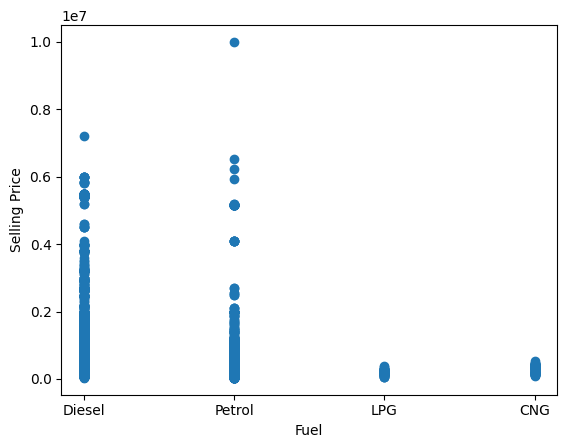

In [9]:
y = car_df.selling_price
plt.scatter(X.fuel, y=y)
plt.xlabel("Fuel")
plt.ylabel("Selling Price")
plt.show()

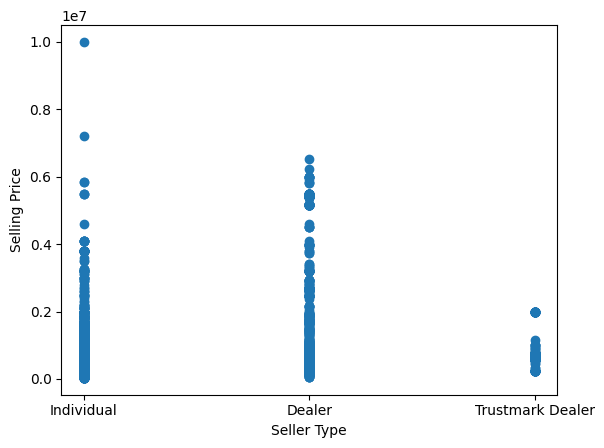

In [10]:
plt.scatter(X.seller_type, y=y)
plt.xlabel("Seller Type")

plt.ylabel("Selling Price")
plt.show()

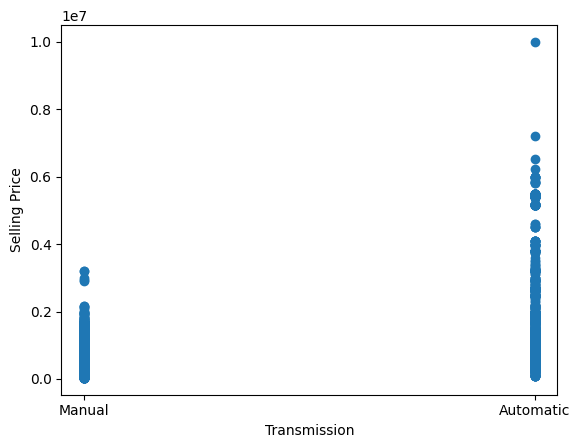

In [11]:
plt.scatter(X.transmission, y=y)
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.show()

In [ ]:
unique_car = car_df["name"].nunique()

C:\Users\thoma\AppData\Local\Temp\ipykernel_19736\2517391490.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\thoma\AppData\Local\Temp\ipykernel_19736\2517391490.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\thoma\AppData\Local\Temp\ipykernel_19736\2517391490.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="owner", y="selling_price", data=car_df, palette="Set1", ax=axes[2, 1])


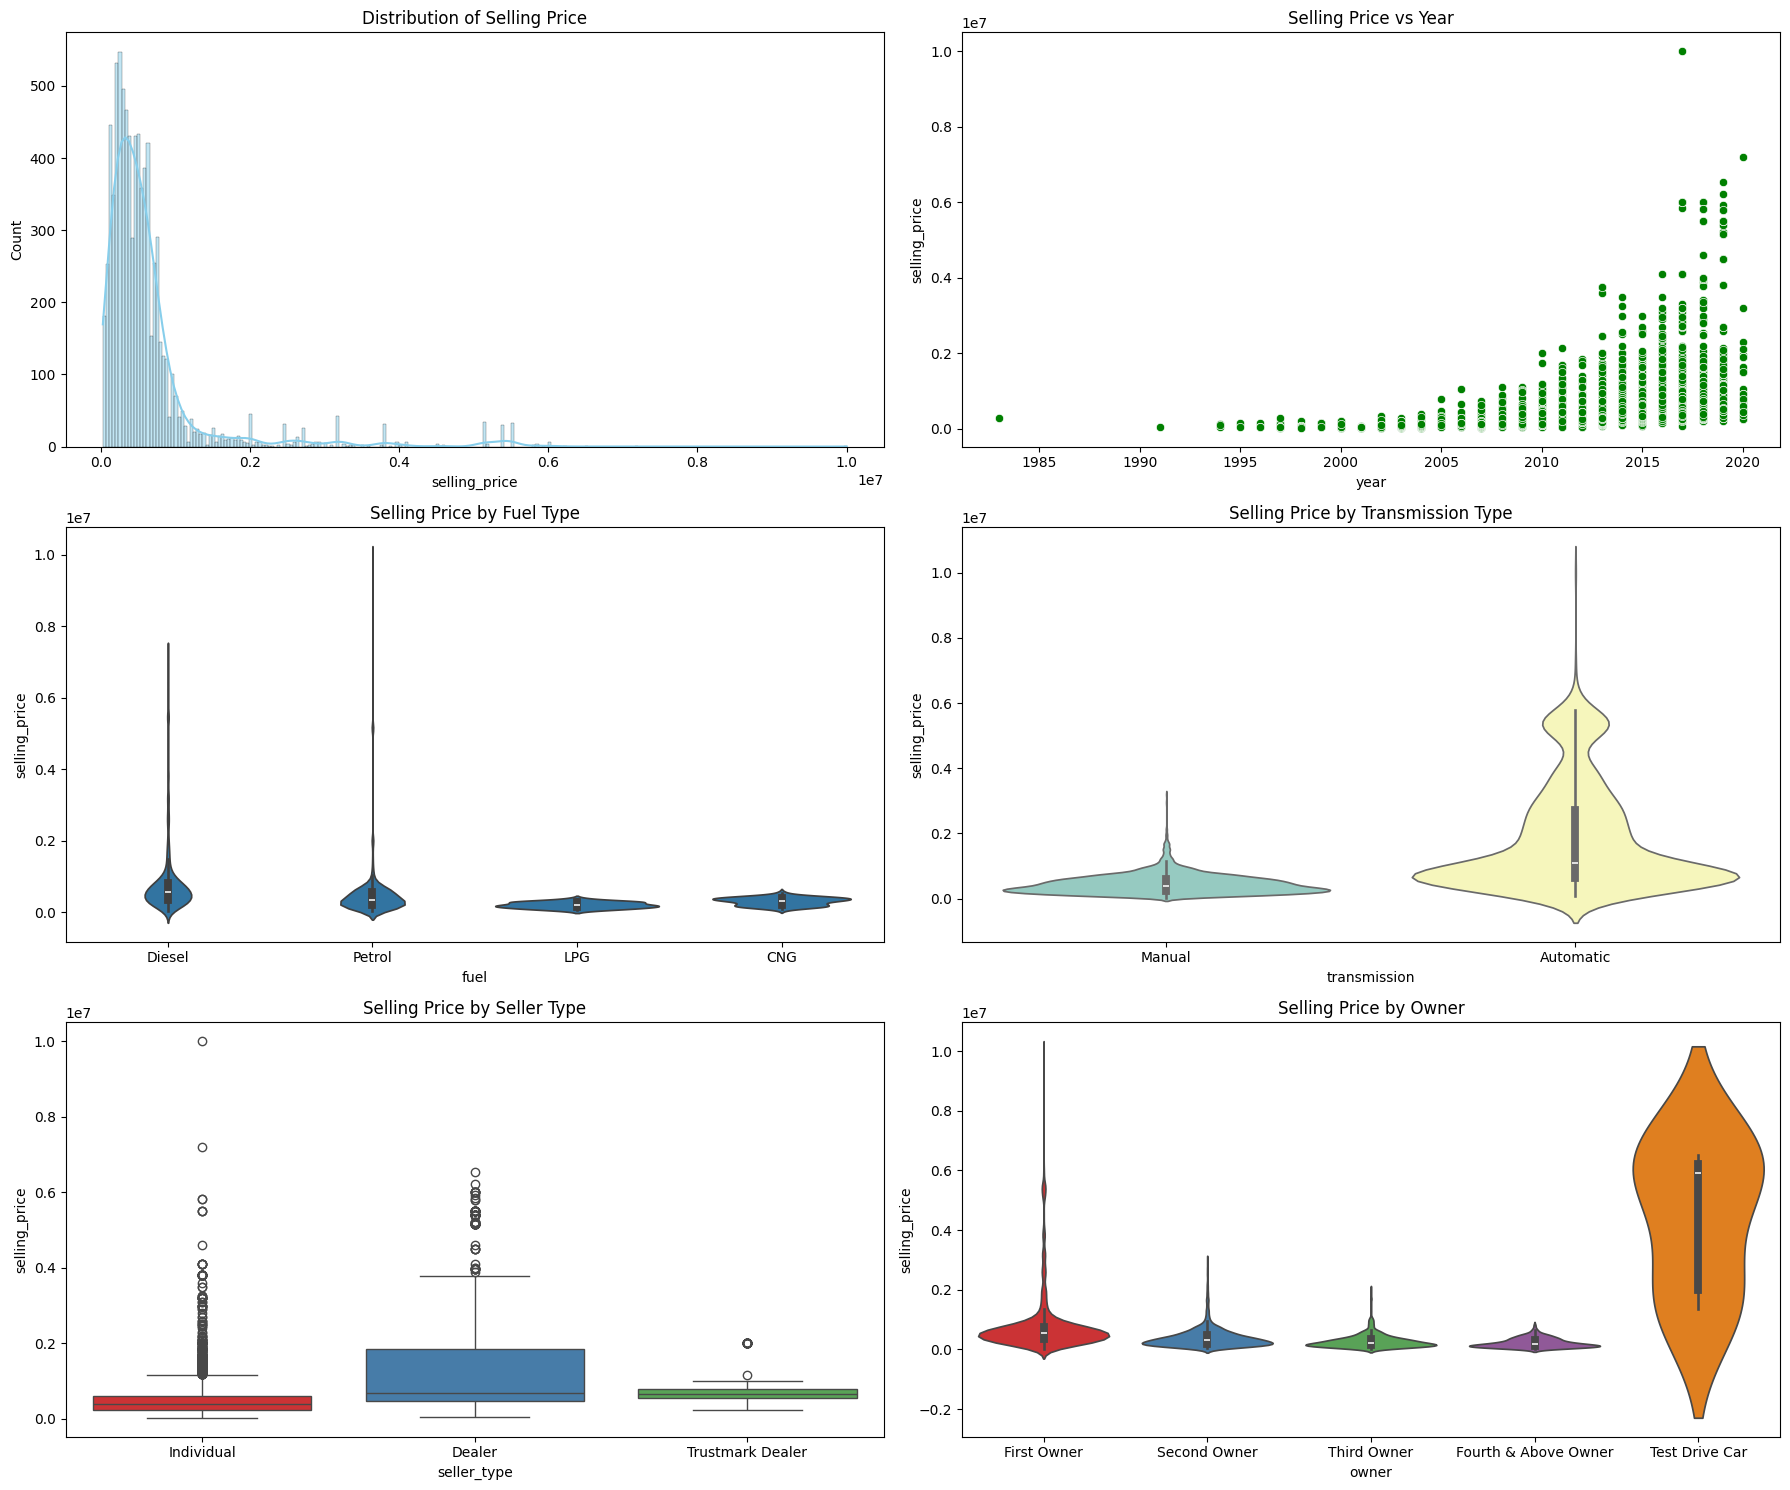

In [13]:
# Créer une figure avec 6 sous-graphiques (3x2)
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Premier sous-graphe
sns.histplot(car_df["selling_price"], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Selling Price")

# Deuxième sous-graphe
sns.scatterplot(x="year", y="selling_price", data=car_df, color="green", ax=axes[0, 1])
axes[0, 1].set_title("Selling Price vs Year")

# Troisième sous-graphe
sns.violinplot(x="fuel", y="selling_price", data=car_df, ax=axes[1, 0])
axes[1, 0].set_title("Selling Price by Fuel Type")

# Quatrième sous-graphe
sns.violinplot(
    x="transmission", y="selling_price", data=car_df, palette="Set3", ax=axes[1, 1]
)
axes[1, 1].set_title("Selling Price by Transmission Type")

# Cinquième sous-graphe
sns.boxplot(
    x="seller_type", y="selling_price", data=car_df, palette="Set1", ax=axes[2, 0]
)
axes[2, 0].set_title("Selling Price by Seller Type")

# Sixième sous-graphe
sns.violinplot(x="owner", y="selling_price", data=car_df, palette="Set1", ax=axes[2, 1])
axes[2, 1].set_title("Selling Price by Owner")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [14]:
# Identifier les variables quantitatives (numériques)
quantitative_features = car_df.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()

# Identifier les variables qualitatives (catégorielles)
qualitative_features = car_df.select_dtypes(include=["object"]).columns.tolist()

print("Variables Quantitatives:", quantitative_features)
print("Variables Qualitatives:", qualitative_features)

Variables Quantitatives: ['year', 'selling_price', 'km_driven', 'seats']
Variables Qualitatives: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


 on se rend compte que mileage, engine, max_power et torque peuvent également être interprété comme des quantitatives après traitement

In [15]:
mileage_values = car_df["mileage"].str.extract(r"(\d+\.?\d*)\s*(kmpl|kmpkg)")
mileage_values.columns = ["value", "unit"]
mileage_values["value"] = mileage_values["value"].astype(float)

# Convertir les valeurs en kmpl (kilometer per liter)
# Supposons que 1 kmpkg = 1.33 kmpl (vous devez ajuster ce facteur de conversion selon les données réelles)
conversion_factor = 1.33
mileage_values["value"] = np.where(
    mileage_values["unit"] == "kmpkg",
    mileage_values["value"] * conversion_factor,
    mileage_values["value"],
)

# Remplacer la colonne mileage dans car_df par les valeurs converties
car_df["mileage"] = mileage_values["value"]

# Afficher les premières lignes pour vérifier
print(car_df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage   engine   max_power  \
0  Individual       Manual   First Owner    23.40  1248 CC      74 bhp   
1  Individual       Manual  Second Owner    21.14  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner    17.70  1497 CC      78 bhp   
3  Individual       Manual   First Owner    23.00  1396 CC      90 bhp   
4  Individual       Manual   First Owner    16.10  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm   

In [ ]:
max_power_values = car_df["max_power"].str.extract(r"(\d+\.?\d*)\s*(bhp)")
max_power_values.columns = ["value", "unit"]
max_power_values["value"] = max_power_values["value"].astype(float)

# remplacer la colonne max_power dans car_df par les valeurs converties
car_df["max_power"] = max_power_values["value"]

In [ ]:
engine_values = car_df["engine"].str.extract(r"(\d+\.?\d*)\s*(CC)")
engine_values.columns = ["value", "unit"]
engine_values["value"] = engine_values["value"].astype(float)

# remplacer la colonne max_power dans car_df par les valeurs converties
car_df["engine"] = engine_values["value"]

on drop toute les lignes na , car on décide qu'elle ne sont pas pertinentes

In [18]:
before = car_df.shape[0]
car_df = car_df.dropna()
after = car_df.shape[0]
print("Nombre de lignes na supprimées, ", before - after)

Nombre de lignes na supprimées,  309


pour le cas de torque ca devient un peu chiant, il faut passer par des expressions régulière pour décomposer le couple des tours mais vu qu'ils sont exprimés volontairement dans un format de merde , un peu la flemme là mtn 
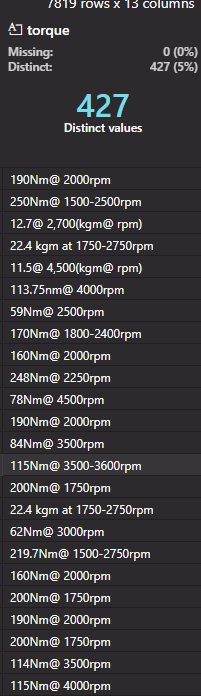

In [ ]:
car_df = car_df.drop(["torque"], axis=1)

In [20]:
quantitative_features = car_df.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()

# Identifier les variables qualitatives (catégorielles)
qualitative_features = car_df.select_dtypes(include=["object"]).columns.tolist()

print("Variables Quantitatives:", quantitative_features)
print("Variables Qualitatives:", qualitative_features)

Variables Quantitatives: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
Variables Qualitatives: ['name', 'fuel', 'seller_type', 'transmission', 'owner']


# encodage des variable qualitative

In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Encodage Ordinal
ordinal_encoder = OrdinalEncoder()
car_df_ordinal = car_df.copy()
car_df_ordinal[qualitative_features] = ordinal_encoder.fit_transform(
    car_df[qualitative_features]
)
print(car_df_ordinal.head())

     name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0  1223.0  2014         450000     145500   0.0          1.0           1.0   
1  1512.0  2014         370000     120000   0.0          1.0           1.0   
2   373.0  2006         158000     140000   1.0          1.0           1.0   
3   730.0  2010         225000     127000   0.0          1.0           1.0   
4  1264.0  2007         130000     120000   1.0          1.0           1.0   

   owner  mileage  engine  max_power  seats  
0    0.0    23.40  1248.0      74.00    5.0  
1    2.0    21.14  1498.0     103.52    5.0  
2    4.0    17.70  1497.0      78.00    5.0  
3    0.0    23.00  1396.0      90.00    5.0  
4    0.0    16.10  1298.0      88.20    5.0  


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Encodage One-Hot
# onehot_encoder = OneHotEncoder(sparse=False)
# onehot_encoded = onehot_encoder.fit_transform(car_df[qualitative_features])
# onehot_encoded_df = pd.DataFrame(
#     onehot_encoded, columns=onehot_encoder.get_feature_names_out(qualitative_features)
# )
# car_df_onehot = car_df.drop(qualitative_features, axis=1)
# car_df_onehot = pd.concat([car_df_onehot, onehot_encoded_df], axis=1)
# print(car_df_onehot.head())



In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Encodage Dummy
# onehot_encoder = OneHotEncoder(sparse=False, drop="first")
# dummy_encoded = onehot_encoder.fit_transform(car_df[qualitative_features])
# dummy_encoded_df = pd.DataFrame(
#     dummy_encoded, columns=onehot_encoder.get_feature_names_out(qualitative_features)
# )
# car_df_dummy = car_df.drop(qualitative_features, axis=1)
# car_df_dummy = pd.concat([car_df_dummy, dummy_encoded_df], axis=1)
# print(car_df_dummy.head())



# gestion des outliers néfaste

In [24]:
# Détection et suppression des outliers
def remove_outliers(df, column):
    """
    Supprime les outliers d'une colonne d'un DataFrame en utilisant l'IQR (Interquartile Range).

    Parameters:
    df (pd.DataFrame): Le DataFrame contenant les données.
    column (str): Le nom de la colonne pour laquelle les outliers doivent être supprimés.

    Returns:
    pd.DataFrame: Le DataFrame avec les outliers supprimés pour la colonne spécifiée.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Appliquer la fonction de suppression des outliers à toutes les colonnes numériques
numeric_features = car_df_ordinal.select_dtypes(include=["int64", "float64"]).columns
for column in numeric_features:
    car_df_ordinal = remove_outliers(car_df_ordinal, column)

# Afficher les premières lignes pour vérifier
print("DataFrame après suppression des outliers:")
print(car_df_ordinal.head())

DataFrame après suppression des outliers:
     name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0  1223.0  2014         450000     145500   0.0          1.0           1.0   
1  1512.0  2014         370000     120000   0.0          1.0           1.0   
2   373.0  2006         158000     140000   1.0          1.0           1.0   
3   730.0  2010         225000     127000   0.0          1.0           1.0   
4  1264.0  2007         130000     120000   1.0          1.0           1.0   

   owner  mileage  engine  max_power  seats  
0    0.0    23.40  1248.0      74.00    5.0  
1    2.0    21.14  1498.0     103.52    5.0  
2    4.0    17.70  1497.0      78.00    5.0  
3    0.0    23.00  1396.0      90.00    5.0  
4    0.0    16.10  1298.0      88.20    5.0  


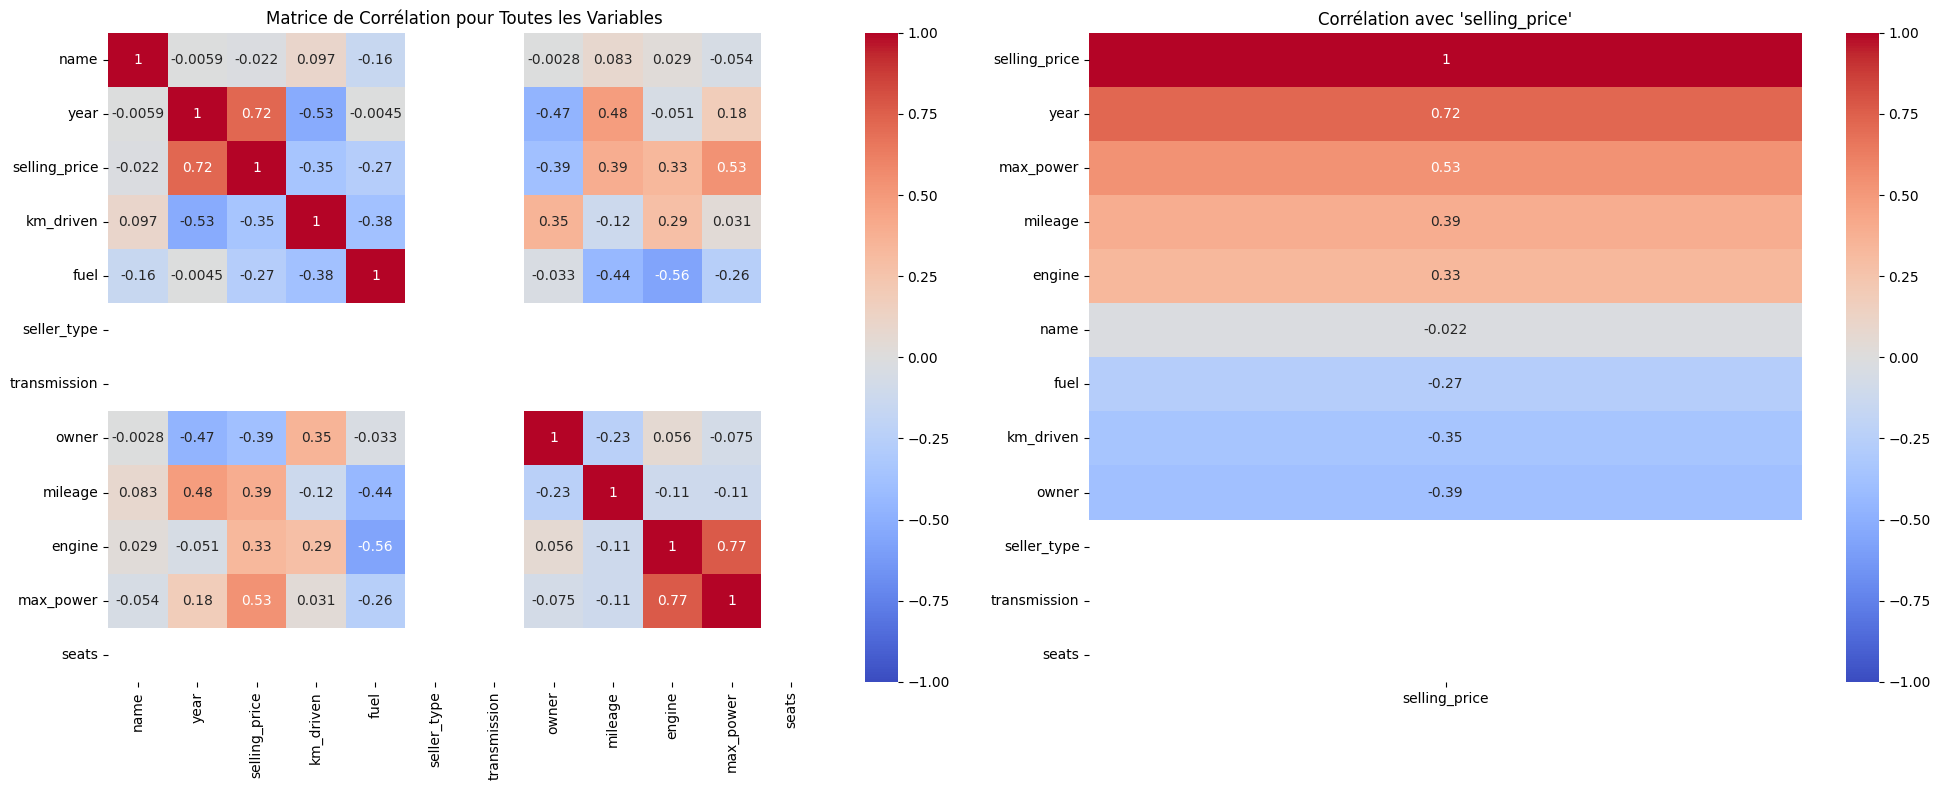

In [25]:
# Calculer la matrice de corrélation pour toutes les variables
correlation_matrix = car_df_ordinal.corr()

# Créer une figure avec 2 sous-graphiques (1x2)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Afficher la matrice de corrélation complète à gauche
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0]
)
axes[0].set_title("Matrice de Corrélation pour Toutes les Variables")

# Afficher la ligne de corrélation pour 'selling_price' à droite
selling_price_corr = correlation_matrix[["selling_price"]].sort_values(
    by="selling_price", ascending=False
)
sns.heatmap(
    selling_price_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1]
)
axes[1].set_title("Corrélation avec 'selling_price'")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [26]:
# Feature Scaling
# Séparer les caractéristiques (features) et la cible (target)
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler


X = car_df_ordinal.drop(["selling_price"], axis=1)
y = car_df_ordinal["selling_price"]

# MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)
print("MinMaxScaler:")
print(X_minmax_scaled_df.head(2))

# StandardScaler
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
X_standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
print("\nStandardScaler:")
print(X_standard_scaled_df.head(2))

# RobustScaler
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
print("\nRobustScaler:")
print(X_robust_scaled_df.head(2))

MinMaxScaler:
       name  year  km_driven  fuel  seller_type  transmission  owner  \
0  0.620690   0.6   0.744845   0.0          0.0           0.0    0.0   
1  0.774005   0.6   0.613402   0.0          0.0           0.0    0.5   

    mileage    engine  max_power  seats  
0  0.679487  0.412511   0.469880    0.0  
1  0.534615  0.639166   0.825542    0.0  

StandardScaler:
       name      year  km_driven      fuel  seller_type  transmission  \
0  0.475501  0.059302   2.007025 -1.084118          0.0           0.0   
1  1.056939  0.059302   1.356023 -1.084118          0.0           0.0   

      owner   mileage    engine  max_power  seats  
0 -0.709623  0.798235  0.168822  -0.181742    0.0  
1  0.890462  0.068034  1.343275   1.701698    0.0  

RobustScaler:
       name  year  km_driven  fuel  seller_type  transmission  owner  \
0  0.234600   0.0   1.493450  -1.0          0.0           0.0    0.0   
1  0.613368   0.0   1.048035  -1.0          0.0           0.0    1.0   

    mileage    eng

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Afficher les dimensions des ensembles d'entraînement et de test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3355, 11)
X_test shape: (839, 11)
y_train shape: (3355,)
y_test shape: (839,)


In [28]:
# Entraînement du modèle de régression linéaire
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul de la MSE
mse = mean_squared_error(y_test, y_pred)


# Calcul de la MAE
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Result of  linear regression ")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2 * 100)

Result of  linear regression 
Mean Squared Error: 12305465014.405302
Mean Absolute Error: 85274.0416628257
R-squared: 73.29405541553717


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du modèle de régression Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf * 100)

Random Forest Regressor
Mean Squared Error: 4106405002.8284082
Mean Absolute Error: 45416.703944576875
R-squared: 91.08807149355856


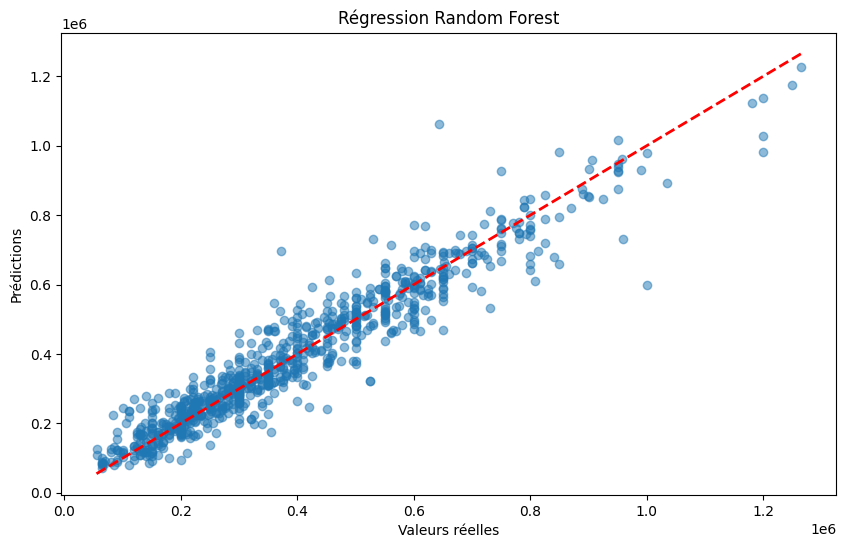

In [30]:
# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Random Forest")
plt.show()

In [32]:
# Définir la grille des hyperparamètres
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialiser le modèle de régression Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2
)

# Entraîner GridSearchCV
grid_search.fit(X_train, y_train)


# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Prédiction sur les données de test avec le meilleur modèle
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor après optimisation")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared (%):", r2_rf * 100)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs hyperparamètres: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Regressor après optimisation
Mean Squared Error: 4077500177.051042
Mean Absolute Error: 45577.107759930004
R-squared (%): 91.15080221316406


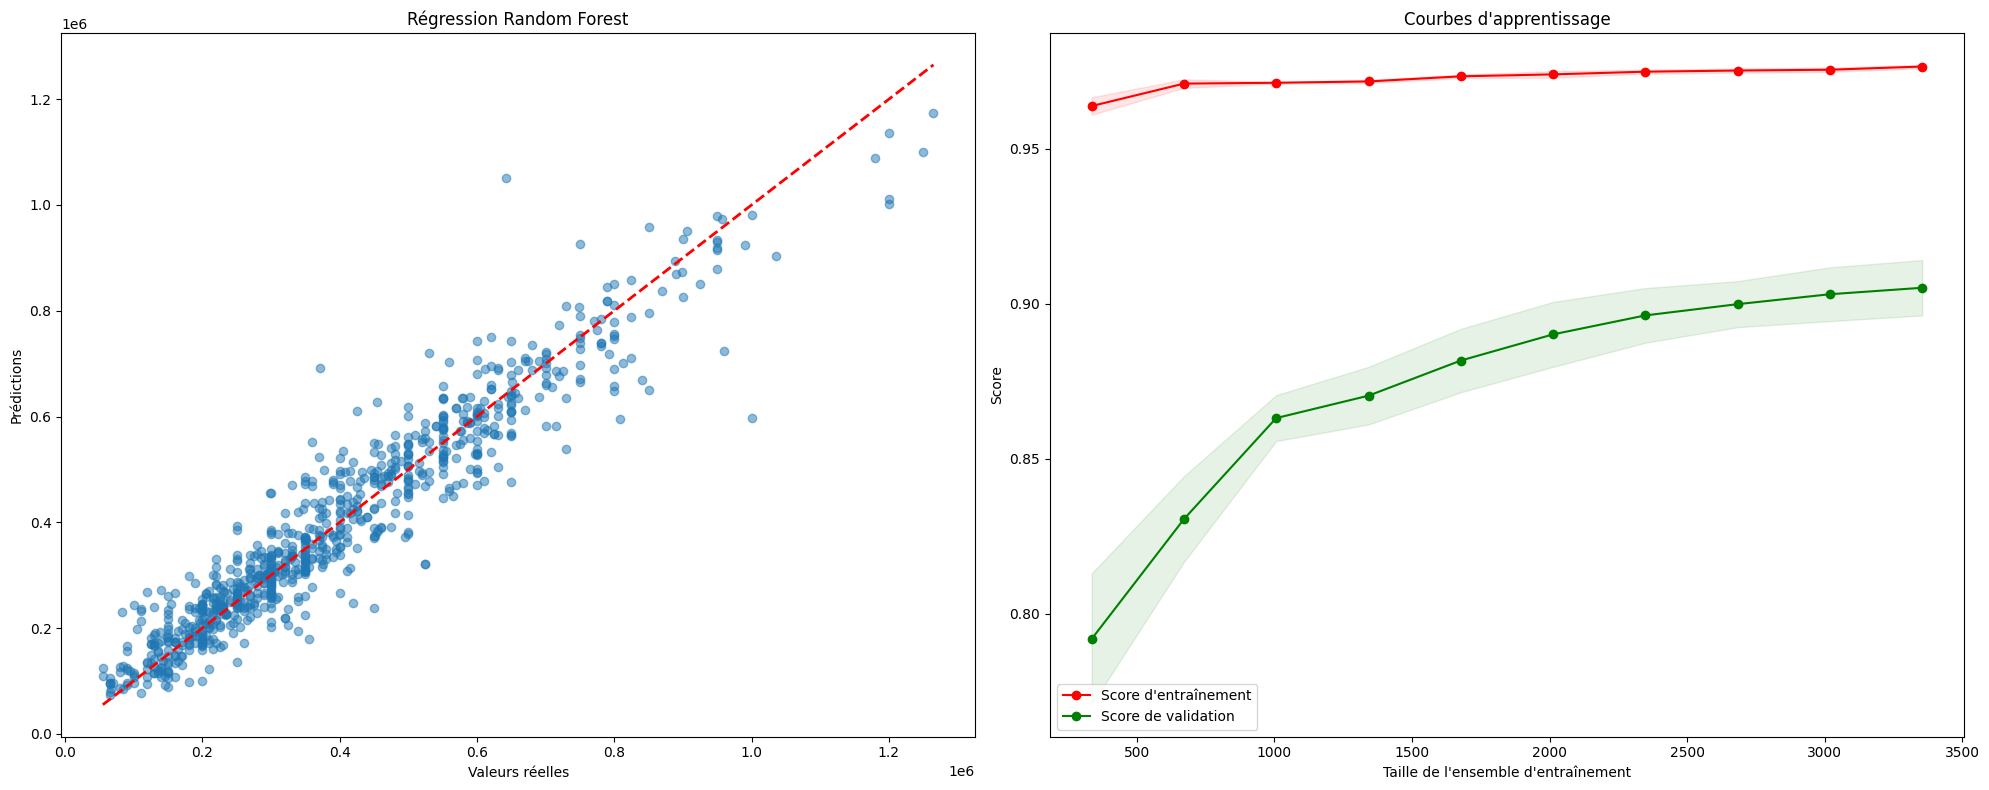

In [33]:
# Visualisation des prédictions et des courbes d'apprentissage côte à côte
from sklearn.model_selection import learning_curve


fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Visualisation des prédictions
axes[0].scatter(y_test, y_pred_rf, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
axes[0].set_xlabel("Valeurs réelles")
axes[0].set_ylabel("Prédictions")
axes[0].set_title("Régression Random Forest")

# Calculer les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model,
    X_standard_scaled,
    y,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
)

# Calculer les moyennes et les écarts-types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer les courbes d'apprentissage
axes[1].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes[1].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes[1].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Score d'entraînement"
)
axes[1].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Score de validation"
)
axes[1].set_xlabel("Taille de l'ensemble d'entraînement")
axes[1].set_ylabel("Score")
axes[1].set_title("Courbes d'apprentissage")
axes[1].legend(loc="best")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

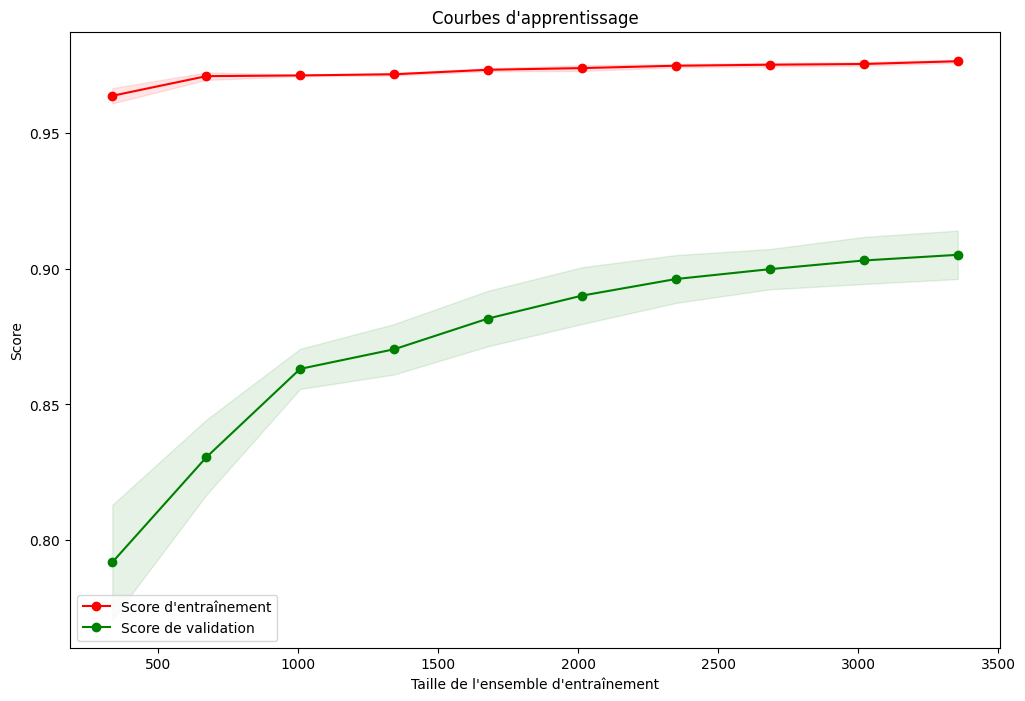

In [34]:
from sklearn.model_selection import learning_curve

# Calculer les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model,
    X_standard_scaled,
    y,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
)

# Calculer les moyennes et les écarts-types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer les courbes d'apprentissage
plt.figure(figsize=(12, 8))
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbes d'apprentissage")
plt.legend(loc="best")
plt.show()

#### Preprocessing : 
> transformer le data pour le mettre dans un format propice au ML.

Checklist (non-exhaustive)
+ Preparation des donnees
    + Création du Train / Test sets
    + Elimination des NaN : dropna(), imputation, colonnes « vides »
    + Encodage (var. catégorielles => dummies)
    + Suppression des outliers néfastes au modèle (à faire plutôt après avoir créer un 1e modèle de Machine Learning)
    + Feature Selection (dans un 1e temps, éliminer les var. avec une variance nulle et les variables redondantes)
    + Feature Engineering
    + Feature Scaling (MinMaxScaler/StandardScaler/RobustScaler)
    Modeling : développer un modèle de Machine Learning qui réponde à l’objectif
    final.
Checklist (non-exhaustive)
    + Définir une fonction d’évaluation (que cherche t-on à mesurer ?)
    + Entrainement de différents modèles
    + Optimisation avec GrisSearchCV
    + (Optionnel) Analyse des erreurs et retour au Preprocessing/EDA
    + Learning Curve (savoir si récolter plus de données permettrait d’améliorer notre modèle)
    + Prise de décision

#### Suppression des outliers


### Elimination des Nans

### Feature Importance Analysis

1. Correlation Analysis: check correlation between Features Target
1. Model-Based Featue importance : Use Random Forrest ===> score of features
1. RFE: Deatermine feature importance by recursively removing less importance features